# Компьютерное зрение
### Часть 2

# Шумы на изображении

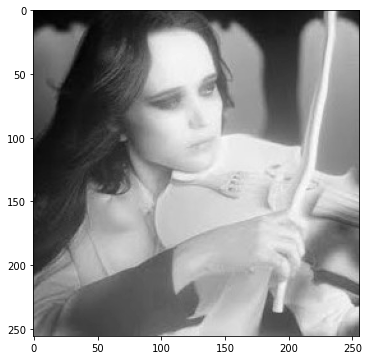

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('./data/Vanya.jpg', 0)
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.show()

### Нормальный (гаусcовый) шум

In [18]:
def gauss_noise(image):
    row, col = image.shape
    
    mean = 0
    disp = 0.1
    sigma = disp**0.5
    gauss = np.random.normal(mean, sigma, (row, col)) * 16
    gauss = gauss.reshape(row, col)
    noisy = image + gauss
    
    return noisy.astype(np.uint8)

<img src="images/LessonsI/7_1_Gaussian distribution.jpg" alt="Gaussian distribution" height=40% width=40%> 

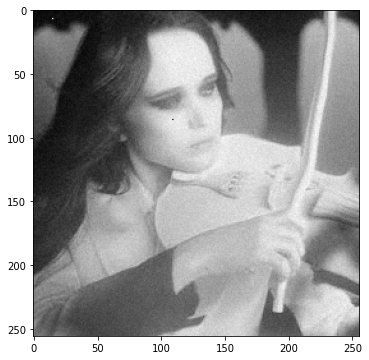

In [19]:
noised = gauss_noise(image)
plt.figure(figsize=(6, 6))
plt.imshow(noised, cmap='gray')
plt.show()

#### Удаление шума

In [20]:
# Размытие (blur)
# Среднее значение окружающих пикселей
img_blur_3 = cv2.blur(image, (3, 3))
img_blur_7 = cv2.blur(image, (7, 7))
img_blur_11 = cv2.blur(image, (11, 11))

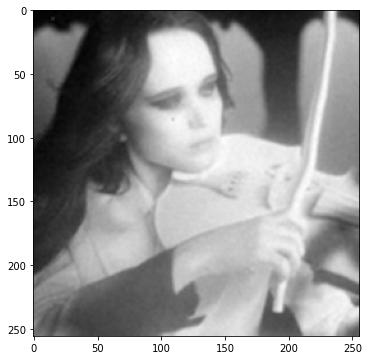

In [21]:
# Гауссово размытие
blured = cv2.GaussianBlur(noised, (3, 3), 3) # третий аргумент стандартное отклонение ядра Гаусса
plt.figure(figsize=(6, 6))
plt.imshow(blured, cmap='gray')
plt.show()

### Шум Соль и перец

In [22]:
def salt_and_pepper_noise(image, s_vs_p=0.5, amount=0.004):
    row, col = image.shape
    out = np.copy(image)
    # Salt mode
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    out[tuple(coords)] = 255

    # Pepper mode
    num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    out[tuple(coords)] = 0
    return out

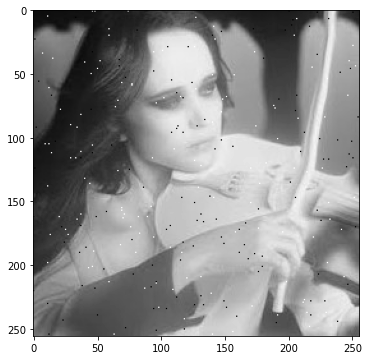

In [23]:
noised = salt_and_pepper_noise(image)
plt.figure(figsize=(6, 6))
plt.imshow(noised, cmap='gray')
plt.show()

#### Удаление шума

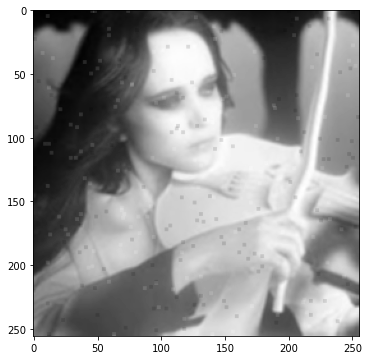

In [24]:
# Гауссово размытие
blured = cv2.GaussianBlur(noised, (3, 3), 3)
plt.figure(figsize=(6, 6))
plt.imshow(blured, cmap='gray')
plt.show()

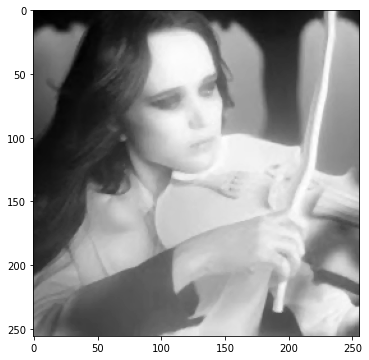

In [25]:
# Медианный фильтр
blured = cv2.medianBlur(noised, 3)
plt.figure(figsize=(6, 6))
plt.imshow(blured, cmap='gray')
plt.show()

# Детектор границ Канни (Canny)

Края(границы) — это такие кривые на изображении, вдоль которых происходит резкое изменение яркости или других видов неоднородностей.

Проще говоря, край — это резкий переход/изменение яркости.
Причины возникновения краёв:
* изменение освещенности
* изменение цвета
* изменение глубины сцены (ориентации поверхности)

Самым популярным методом выделения границ является детектор границ Кенни.

Хотя работа Кенни была проведена на заре компьютерного зрения (1986), детектор границ Кенни до сих пор является одним из лучших детекторов.

Шаги детектора:
* Убрать шум и лишние детали из изображения
* Рассчитать градиент изображения
* Сделать края тонкими (edge thinning)
* Связать края в контура (edge linking)

Границы на изображении могут находиться в различных направлениях, поэтому алгоритм Кенни использует четыре фильтра для выявления горизонтальных, вертикальных и диагональных границ. Воспользовавшись оператором обнаружения границ (например, оператором Собеля) получается значение для первой производной в горизонтальном направлении (Gу) и вертикальном направлении (Gx).  
Из этого градиента можно получить угол направления границы:

    Q=arctan(Gx/Gy)

Угол направления границы округляется до одной из четырех углов, представляющих вертикаль, горизонталь и две диагонали (например, 0, 45, 90 и 135 градусов).  
Затем идет проверка того, достигает ли величина градиента локального максимума в соответствующем направлении.

<img src="images/LessonsI/7_2_Gradient.png" alt="Gradient" height=80% width=50%> 
<img src="images/LessonsI/7_3_Histogramm.png" alt="Histogramm" height=80% width=50%> 

* если угол направления градиента равен нулю, точка будет считаться границей, если её интенсивность больше чем у точки выше и ниже рассматриваемой точки,
* если угол направления градиента равен 90 градусам, точка будет считаться границей, если её интенсивность больше чем у точки слева и справа рассматриваемой точки,
* если угол направления градиента равен 135 градусам, точка будет считаться границей, если её интенсивность больше чем у точек находящихся в верхнем левом и нижнем правом углу от рассматриваемой точки
* если угол направления градиента равен 45 градусам, точка будет считаться границей, если её интенсивность больше чем у точек находящихся в верхнем правом и нижнем левом углу от рассматриваемой точки.

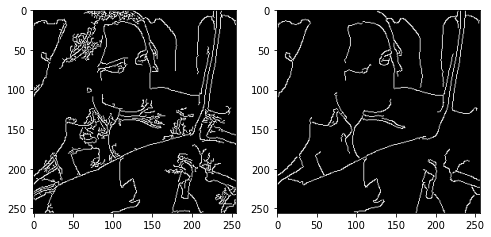

In [26]:
blured = cv2.GaussianBlur(image, (3, 3), 3)
edges_orig = cv2.Canny(image, 10, 200)
edges_blur = cv2.Canny(blured, 10, 200)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(edges_orig, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(edges_blur, cmap='gray')
plt.show()

# Аугментация данных

**Аугментация данных** (data augmentation) – это методика создания дополнительных обучающих данных из имеющихся данных. Для достижения хороших результатов глубокие сети должны обучаться на очень большом объеме данных. Следовательно, если исходный обучающий набор содержит ограниченное количество изображений, необходимо выполнить аугментацию, чтобы улучшить результаты модели.

Можно использовать следующие искажения:
* Геометрические (афинные, проективные, ...);
* Яркостные/цветовые;
* Замена фона;
* Искажения, характерные для решаемой задачи: блики, шумы, размытие и т. д.

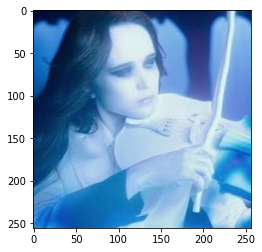

In [27]:
image = cv2.imread('./data/Vanya.jpg')[..., ::-1]
plt.imshow(image)
plt.show()

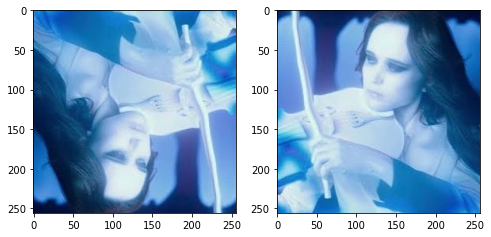

In [28]:
### Отражение
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image[::-1])
plt.subplot(1, 2, 2)
plt.imshow(cv2.flip(image, 1))
plt.show()

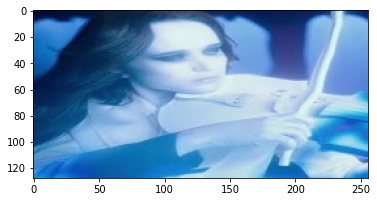

In [29]:
### Изменение размера
result = cv2.resize(image, (256, 128))
plt.imshow(result)
plt.show()

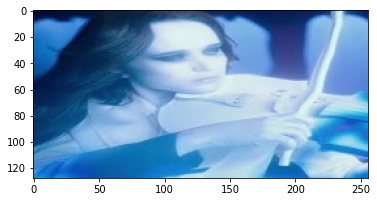

In [30]:
### Поворот
rot_mat = cv2.getRotationMatrix2D((128, 128), 30, 1.0)
                                 #(center, angle, resize); resize [0 ..cv2.warpAffine(image, rot_mat, (256, 256), flags=cv2.INTER_LINEAR)
plt.imshow(result)
plt.show()

In [31]:
# [[cos(a),  sin(a)]
#  [-sin(a), cos(a)]]

rot_mat

array([[  0.8660254 ,   0.5       , -46.85125168],
       [ -0.5       ,   0.8660254 ,  81.14874832]])

<img src="images/LessonsI/7_4_R_mat.jpg" alt="Rotation matrix" height=50% width=50%> 

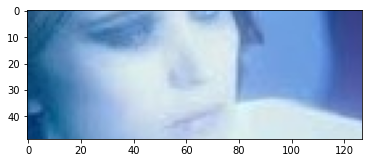

In [32]:
# Случайное образание
np.random.seed(43)
bbox = np.random.randint(0, 128, size=4)  # x, y, w, h
result = image[bbox[1]:bbox[1]+bbox[3], bbox[0]:bbox[0]+bbox[2]]
plt.imshow(result)
plt.show()

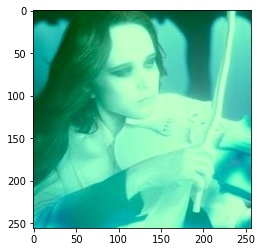

In [33]:
# Сдвиг по каналам
np.random.seed(42)
rgb_shift = np.random.randint(-128, 128, size=3)
result = image.astype(np.int32) + rgb_shift  # Зачем переводим в np.int32?
result = np.clip(result, 0, 255).astype(np.uint8)  # Обрезаем значения до диапазона 0 - 255
plt.imshow(result)
plt.show()

In [34]:
print("opencv addition: {}".format(cv2.add(np.uint8([250]), 
                                            np.uint8([30]))))
print("opencv subtract: {}".format(cv2.subtract(np.uint8([70]), 
                                                np.uint8([100]))))
print("numpy addition: {}".format(np.uint8([250]) + np.uint8([30])))
print("numpy subtract: {}".format(np.uint8([70]) - np.uint8([71])))

opencv addition: [[255]]
opencv subtract: [[0]]
numpy addition: [24]
numpy subtract: [255]


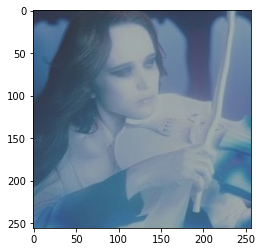

In [35]:
# Изменение яркости, контрастности
alpha, betta = 0.5, 50
result = alpha*image.astype(np.int32) + betta
result = np.clip(result, 0, 255).astype(np.uint8)
plt.imshow(result)
plt.show()

# Сравнение изображений

Задача:  
    **Имеются 2 изображения, содержащие объекты. Определить, содержат ли изображения одинаковые объекты?**

## Прямое сопоставление (корреляция)

$$
R(x, y) = {{\sum_{x', y'}T(x', y')*I(x+x', y+y')} \over \sqrt{\sum_{x', y'}T^2(x', y')\sum_{x', y'}I^2(x+x', y+y')}}
$$

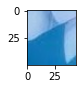

In [36]:
template = image[175:225, 75:120].copy()
plt.figure(figsize=(1, 1))
plt.imshow(template)
plt.show()

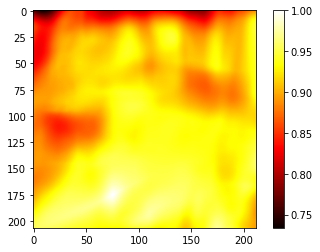

In [37]:
match = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
plt.imshow(match, cmap='hot')
plt.colorbar()
plt.show()

# Локальные особенности

Этапы работы с локальными особенностями:
* Извлечение признаков или выделение областей с локальными особенностями
* Описание признаков, хорактерных для выбранных особенностей
* Сравнение признаков между собой

Необходимые требования к особенностям:
* Повторяемость (не зависит от ракурса, освещения и т.п.)
* Значимость (уникальное описание для точек)
* Локальность (маленькая площадь)

В качестве локальных особенностей в основном используюут **углы** и **пятна**

## Детектор углов Харриса

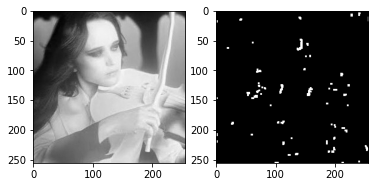

In [38]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
# img: входное изображение, должно быть в оттенках серого и типом float32
# blockSize: размер области, рассматриваемой для обнаружения угла.
# ksize: параметр "апертуры" производной Собеля
# k: Свободные параметр детектора Харриса в уравнении
dst = cv2.dil(dst,None) # Расширение изображения
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(dst, cmap='gray')
plt.show()

# Описание локальных особенностей

https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html

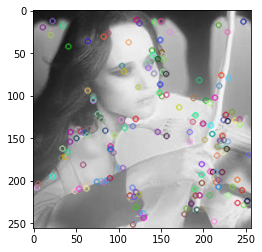

In [39]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Scale Invariant Feature Transform
# список (х,y,σ) значений
sift = cv2.SIFT_create()
kp = sift.detect(gray, None)
#descriptors = sift.compute()
result = image.copy()
result = cv2.drawKeypoints(gray, kp, result)
plt.imshow(result, cmap='gray')
plt.show()

Now keypoint descriptor is created. A 16x16 neighbourhood around the keypoint is taken. It is divided into 16 sub-blocks of 4x4 size. For each sub-block, 8 bin orientation histogram is created. So a total of 128 bin values are available. It is represented as a vector to form keypoint descriptor. 
<img src="images/LessonsI/7_5_sift_descriptor.png" alt="Rotation matrix" height=50% width=50%> 

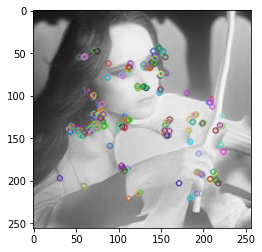

In [40]:
# ORB - это в основном слияние детектора ключевых точек FAST и 
# дескриптора BRIEF со многими модификациями для повышения производительности
# SIFT и SURF запатентованы, и вы должны платить им за их использование. Но не за ORB )
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.ORB_create()
kp = sift.detect(gray, None)

result = image.copy()
result = cv2.drawKeypoints(gray, kp, result)
plt.imshow(result, cmap='gray')
plt.show()

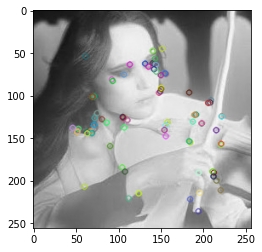

In [41]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sift = cv2.BRISK_create() # производный от алгоритма Fast
kp = sift.detect(gray, None)

result = image.copy()
result = cv2.drawKeypoints(gray, kp, result)
plt.imshow(result, cmap='gray')
plt.show()

FAST analyzes the circular surroundings of each pixel "p". Is the surrounding pixel’s brightness lower / higher than of "p". If a certain number of connected pixels fulfill this criterion, the algorithm has found a corner. This is indicated by the dotted line in the image below. Pixels 7 to 10 are darker than "p"; the others are brighter.
<img src="images/LessonsI/7_6_FAST.png" alt="Rotation matrix" height=50% width=50%> 
FAST algorithm by Rosten and Drummond. Image credits: Rosten E., Drummond T. (2006) Machine Learning for High-Speed Corner Detection. In: Leonardis A., Bischof H., Pinz A. (eds) Computer Vision – ECCV 2006. ECCV 2006. Lecture Notes in Computer Science, vol 3951. Springer, Berlin, Heidelberg

For BRISK, at least 9 consecutive pixels in the 16-pixel circle must be sufficiently brighter or darker than the central pixel. In addition, BRISK also uses down-sized images (scale-space pyramid) to achieve better invariance to scale – even reaching sub-pixel accuracy.

# Сравнение признаков

In [45]:
# read images
img1 = cv2.imread('data/eiffel1.png')  
img2 = cv2.imread('data/eiffel2.png') 

#sift
sift = cv2.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None)

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True) # Brute-Force Matching
                 #(normType, crossCheck)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)

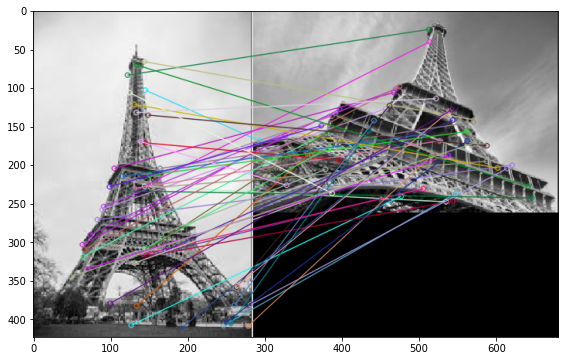

In [46]:
plt.figure(figsize=(10, 6))
plt.imshow(img3)
plt.show()

# Другие возможности OpenCV
* Калибровка камер
* Стереозрение
* Построение карты глубины
* Построение 3Д моделей по нескольким изображениям
* Отслеживание объектов на видео
* Детектор лиц
и многе другое

# Задания

1. Для датасета Nails segmentation создать генератор, который на каждой итерации возвращает пару списков из заданного количества (аргумент функции) изображений и масок к ним (итератор должен перемешивать примеры).  
2. Добавить в генератор случайную аугментацию (каждая применяется случайно). После преобразований все изображения должны иметь одинаковый размер. *Обратите внимание, что большинство преобразований должны применяться одинаково к изображению и маске*
    1. Поворот на случайный угол
    2. Отражение по вертикали, горизонтали
    3. Вырезание части изображения
    4. Размытие  
   

# Лабораторная работа 7. Хэллоуинский переполох

<img src="images/LessonsI/Helloween.png" alt="Helloween" height=60% width=60%>

Из дома с привидениями разбежались все призраки и проказничают в саду. Помогите хозяину дома поймать всех призраков.
Орентировки на призраков нужно скачать [тут](https://drive.google.com/file/d/1NjyvMtLGVisiz6jNBgO8H6efKZE8tiol/view?usp=sharing)


## Лабораторная 7.1/7.2
Ловлю призраков необходимо реализовать через поиск и сопоставление ключевых точек на изображениях. Алгоритм должен состоять из следующих шагов:
* Загрузка изображения, на котором необходимо осуществлять поиск;
* Загрузка изображения(ий) призраков; 
* Обнаружить на них ключевые точки и вычислить для них любые понравившиеся вам дескрипторы SIFT, SURF, ORB;
* Сопоставить точки шаблона (призрака) с точками изображения через Brute-Force Matching или FLANN Matching  и найти какой области соответстветствует призрак;
* Найти гомографию используя алгоритм RANSAC. Выделить призрака на изображение рамкой.

Ключевые слова для поиска в Google и документации OpenCV: *findHomography, RANSAC, SIFT_Create, FlannBasedMatcher.*

ЛР 7.1: нужно поймать одного призрака
ЛР 7.2: нужно поймать всех призраков